<h1>Random Forest Regressor Produksi Ikan Nila tahun 2020 dan 2023 di Indonesia

<text>Proyek ini bertujuan untuk memprediksi nilai Produksi Ikan Nila 2023 berdasarkan:

    Produksi Tahun 2020
    Temperature Tahun 2020
    Temperature Tahun 2023

Dengan pendekatan machine learning supervised learning, model Random Forest Regressor digunakan untuk mengidentifikasi input dari project dalam produksi dan temperature dari tahun sebelumnya.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 2. Cek data
df = pd.read_csv('new.csv', sep=';', decimal=',')
print(df.head())

df['Temperature Tahun 2023'] = df['Temperature Tahun 2023'].astype(str).str.replace(',', '.').replace('', 'NaN')
df['Temperature Tahun 2023'] = pd.to_numeric(df['Temperature Tahun 2023'], errors='coerce')

df = df.dropna(subset=['Ikan Nila 2023', 'Temperature Tahun 2023'])

df['Ikan Nila 2023'] = df['Ikan Nila 2023'].str.replace('.', '', regex=False).astype(float)

le = LabelEncoder()
df['Provinsi_enc'] = le.fit_transform(df['Provinsi'])

# 5. Siapkan fitur dan target
X = df[['Provinsi_enc', 'Temperature Tahun 2023']]
y = df['Ikan Nila 2023']

# 6. Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Buat model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 10. Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

provinsi_baru = 'JAWA TENGAH'
suhu_baru = 26.0
provinsi_enc_baru = le.transform([provinsi_baru])[0]

# Buat array fitur
X_new = [[provinsi_enc_baru, suhu_baru]]

# Prediksi
prediksi_baru = model.predict(X_new)[0]
print(f"Prediksi produksi ikan nila di {provinsi_baru} dengan suhu {suhu_baru}°C adalah sekitar {prediksi_baru:.0f}")


  Ikan Nila 2023  Temperature Tahun 2023        Provinsi
0      1.368.542                     NaN       INDONESIA
1          1.407                     NaN       KEP. RIAU
2          1.651                   27.80    MALUKU UTARA
3        109.262                   25.75     JAWA TENGAH
4         11.677                   23.16  SULAWESI BARAT
Mean Squared Error: 9616638050.94
R2 Score: 0.05
Prediksi produksi ikan nila di JAWA TENGAH dengan suhu 26.0°C adalah sekitar 82256


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [3]:
print(df[['Ikan Nila 2023', 'Temperature Tahun 2023']].corr())

                        Ikan Nila 2023  Temperature Tahun 2023
Ikan Nila 2023                1.000000               -0.172569
Temperature Tahun 2023       -0.172569                1.000000


Suhu yang naik ataupun turun disini tidak mempengaruhi produksi ikan

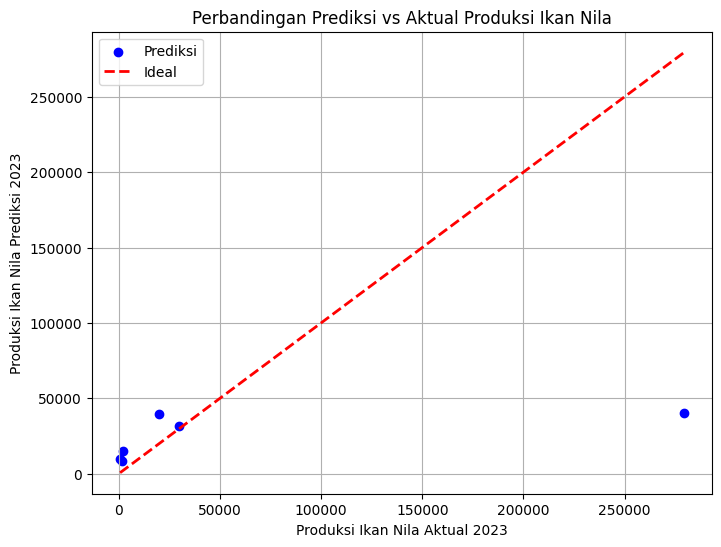

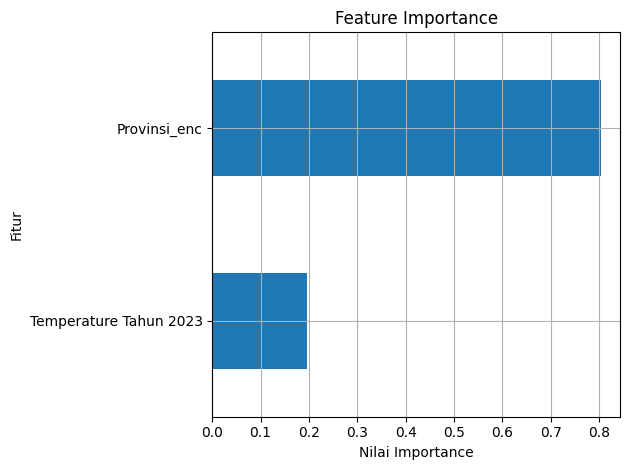

Train R²: 0.8738864429645823
Test R² : 0.05001618149547704


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi 1: Scatter plot Prediksi vs Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Prediksi')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Produksi Ikan Nila Aktual 2023")
plt.ylabel("Produksi Ikan Nila Prediksi 2023")
plt.title("Perbandingan Prediksi vs Aktual Produksi Ikan Nila")
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi 2: Feature Importance (fitur yang paling berpengaruh)
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', title='Feature Importance')
plt.xlabel("Nilai Importance")
plt.ylabel("Fitur")
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluasi tambahan
print("Train R²:", model.score(X_train, y_train))
print("Test R² :", model.score(X_test, y_test))

# Simpan model (jika diperlukan untuk dipakai ulang)
import pickle
with open('model_rf.pkl', 'wb') as f:
    pickle.dump(model, f)

# Contoh load model kembali
with open('model_rf.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
